## State space diagnostics

It is important to run post-estimation diagnostics on all types of models. In state space models, if the model is correctly specified, the standardized one-step ahead forecast errors should be independent and identically Normally distributed. Thus, one way to assess whether or not the model adequately describes the data is to compute the standardized residuals and apply diagnostic tests to check that they meet these distributional assumptions.

Although there are many available tests, Durbin and Koopman (2012) and Harvey (1990) suggest three basic tests as a starting point:

- **Normality**: the [Jarque–Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)
- **Heterskedasticity**: a test similar to the [Goldfeld-Quandt test](https://en.wikipedia.org/wiki/Goldfeld%E2%80%93Quandt_test)
- **Serial correlation**: the [Ljung-Box test](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test)

These have been added to Statsmodels in [this pull request (2431)](https://github.com/statsmodels/statsmodels/pull/2431), and their results are added as an additional table at the bottom of the `summary` output (see the table below for an example).

Furthermore, graphical tools can be useful in assessing these assumptions. Durbin and Koopman (2012) suggest the following four plots as a starting point:

1. A time-series plot of the standardized residuals themselves
2. A histogram and kernel-density of the standardized residuals, with a reference plot of the Normal(0,1) density
3. A [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) against Normal quantiles
4. A [correlogram](https://en.wikipedia.org/wiki/Correlogram)

To that end, I have also added a `plot_diagnostics` method which creates those following four plots.

In [1]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import seaborn as sn

In [2]:
from pandas_datareader.data import DataReader
lgdp = np.log(DataReader('GDPC1', 'fred', start='1984-01', end='2005-01'))

                                 Statespace Model Results                                
Dep. Variable:                             GDPC1   No. Observations:                   85
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 3)   Log Likelihood                 310.194
Date:                           Sun, 22 Jan 2017   AIC                           -608.389
Time:                                   14:23:06   BIC                           -593.733
Sample:                               01-01-1984   HQIC                          -602.494
                                    - 01-01-2005                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1672      0.111      1.507      0.132      -0.050       0.385
ar.L2          0.3217      0.115      2.808

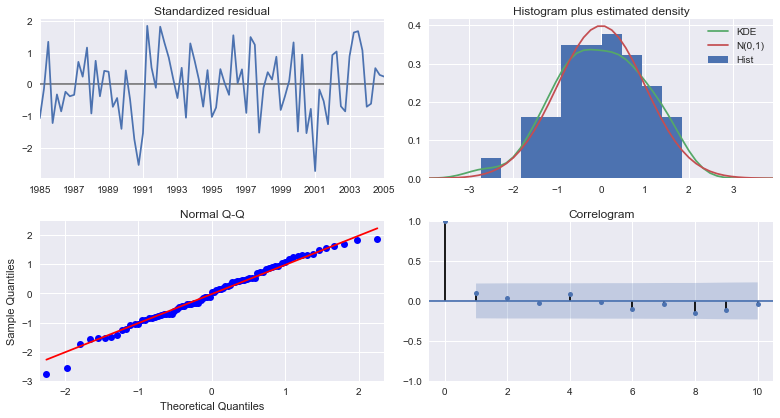

In [4]:
mod = sm.tsa.SARIMAX(lgdp, order=(2,1,0), seasonal_order=(3,1,0,3))
res = mod.fit()
print res.summary()

fig = res.plot_diagnostics(figsize=(11,6))
fig.tight_layout()